In [42]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

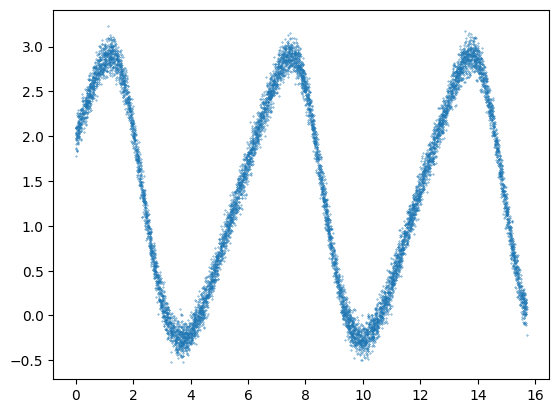

In [43]:
num_points = 10000
X = np.random.uniform(0, 5 * np.pi, num_points)
Y = np.exp(np.sin(X)) + np.cos(X)

# add some noise to the data
Y += np.random.normal(0, 0.1, num_points)

plt.scatter(X, Y, s=0.1)
plt.show()

In [44]:
Y = np.array(Y)
X= np.array(X)


In [45]:
data = pd.DataFrame({'Y': Y, 'X': X, 'sinx': np.sin(X), 'cosx': np.cos(X), 'X^2': X**2, 'X^3': X**3})
data = np.array(data)

In [46]:
np.random.shuffle(data)

data

array([[ 2.56843612e+00,  6.97260581e+00,  6.36090142e-01,
         7.71614756e-01,  4.86172318e+01,  3.38988793e+02],
       [ 2.84046366e+00,  7.44926572e+00,  9.19214297e-01,
         3.93757636e-01,  5.54915598e+01,  4.13371375e+02],
       [ 2.85571016e+00,  7.30922084e+00,  8.55251277e-01,
         5.18213521e-01,  5.34247093e+01,  3.90492999e+02],
       ...,
       [ 1.59352592e+00,  1.47557196e+01,  8.14718551e-01,
        -5.79856605e-01,  2.17731261e+02,  3.21278144e+03],
       [ 1.20877533e+00,  1.17562221e+01, -7.24389549e-01,
         6.89390877e-01,  1.38208759e+02,  1.62481287e+03],
       [ 1.84234876e+00,  1.46818329e+01,  8.55300424e-01,
        -5.18132401e-01,  2.15556217e+02,  3.16476035e+03]])

In [47]:
X = data.T[1:6]
Y = data.T[0:1]

In [48]:
X_train = X.T[0:8000].T
Y_train = Y.T[0:8000].T

X_test = X.T[8000:].T
Y_test = Y.T[8000:].T

X_train.shape

(5, 8000)

In [49]:
def init_params():
    W1 = np.random.rand(32, 5) - 0.5
    b1 = np.random.rand(32, 1) - 0.5
    W2 = np.random.rand(32, 32) - 0.5
    b2 = np.random.rand(32, 1) - 0.5
    W3 = np.random.rand(32, 32) - 0.5
    b3 = np.random.rand(32, 1) - 0.5
    W4 = np.random.rand(32, 32) - 0.5
    b4 = np.random.rand(32, 1) - 0.5
    W5 = np.random.rand(1, 32) - 0.5
    b5 = np.random.rand(1, 1) - 0.5
    return W1, b1, W2, b2, W3, b3, W4, b4, W5, b5

In [50]:
def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

def tanh(Z):
    return np.tanh(Z)

def tanh_deriv(Z):
    return 1 - np.tanh(Z) ** 2

In [51]:
def forward_prop(X, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5):
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = ReLU(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = ReLU(Z3)
    Z4 = np.dot(W4, A3) + b4
    A4 = ReLU(Z4)
    Z5 = np.dot(W5, A4) + b5
    A5 = Z5
    return Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, A5

In [52]:
def backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, A5, W1, W2, W3, W4, W5, X, Y):
    m = X.shape[1]
    dZ5 = A5 - Y
    dW5 = np.dot(dZ5, A4.T) / m
    db5 = np.sum(dZ5, axis=1, keepdims=True) / m
    dA4 = np.dot(W5.T, dZ5)
    dZ4 = dA4 * ReLU_deriv(Z4)
    dW4 = np.dot(dZ4, A3.T) / m
    db4 = np.sum(dZ4, axis=1, keepdims=True) / m
    dA3 = np.dot(W4.T, dZ4)
    dZ3 = dA3 * ReLU_deriv(Z3)
    dW3 = np.dot(dZ3, A2.T) / m
    db3 = np.sum(dZ3, axis=1, keepdims=True) / m
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = dA2 * ReLU_deriv(Z2)
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * ReLU_deriv(Z1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    return dW1, db1, dW2, db2, dW3, db3, dW4, db4, dW5, db5

In [53]:
def update_parameters(W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, dW1, db1, dW2, db2, dW3, db3, dW4, db4, dW5, db5, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    W3 -= alpha * dW3
    b3 -= alpha * db3
    W4 -= alpha * dW4
    b4 -= alpha * db4
    W5 -= alpha * dW5
    b5 -= alpha * db5
    return W1, b1, W2, b2, W3, b3, W4, b4, W5, b5

In [54]:
def mse(A3, Y):
    m = Y.shape[1]
    return np.sum((A3 - Y) ** 2) / m

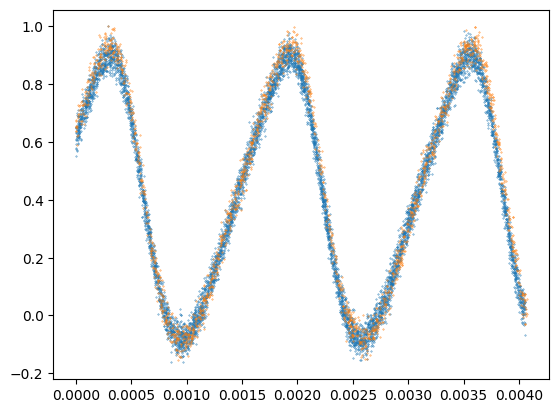

In [55]:
X_train = X_train / np.max(X_train)
Y_train = Y_train / np.max(Y_train)
X_test = X_test / np.max(X_test)
Y_test = Y_test / np.max(Y_test)

plt.scatter(X_train[0], Y_train[0], s=0.1)
plt.scatter(X_test[0], Y_test[0], s=0.1)

In [56]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, A5 = forward_prop(X, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5)
        if i % 10 == 0:
            print("loss: ", mse(A3, Y), "iteration: ", i)
            if i % 5000 == 0:
                plt.scatter(X[0], A5, s=0.1, label=f'{i}th iteration', c='r')
                plt.scatter(X[0], Y, c='b', s=0.1)
                plt.show()

        dW1, db1, dW2, db2, dW3, db3, dW4, db4, dW5, db5 = backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, A5, W1, W2, W3, W4, W5, X, Y)
        W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = update_parameters(W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, dW1, db1, dW2, db2, dW3, db3, dW4, db4, dW5, db5, alpha)

    return W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, A5

loss:  9.547660792233751 iteration:  0


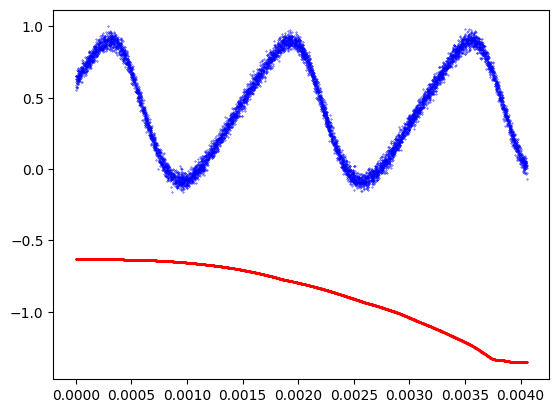

loss:  9.917188154845777 iteration:  10
loss:  9.937602928401617 iteration:  20
loss:  9.949240170999776 iteration:  30
loss:  9.952737649085867 iteration:  40
loss:  9.945158432547041 iteration:  50
loss:  9.93521897325435 iteration:  60
loss:  9.92426307962054 iteration:  70
loss:  9.9163766820309 iteration:  80
loss:  9.917537614615364 iteration:  90
loss:  9.917344017483812 iteration:  100
loss:  9.917082771658492 iteration:  110
loss:  9.916796465131101 iteration:  120
loss:  9.916472555106067 iteration:  130
loss:  9.916126244276512 iteration:  140
loss:  9.915993988576956 iteration:  150
loss:  9.916280242786893 iteration:  160
loss:  9.916811016127065 iteration:  170
loss:  9.917470706125345 iteration:  180
loss:  9.918196055973784 iteration:  190
loss:  9.918881613949857 iteration:  200
loss:  9.91950925850756 iteration:  210
loss:  9.920012520748665 iteration:  220
loss:  9.920470614179045 iteration:  230
loss:  9.920716802221717 iteration:  240
loss:  9.920893432432504 itera

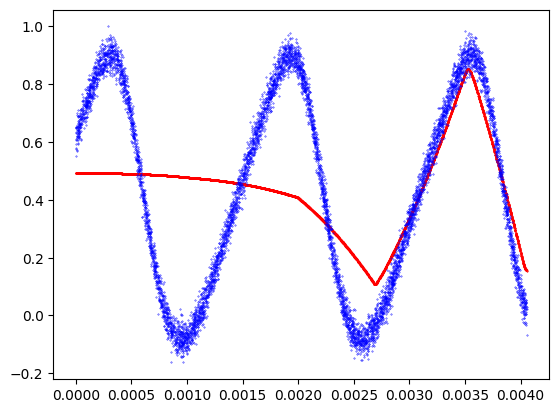

loss:  10.573386042081866 iteration:  5010
loss:  10.575209690744478 iteration:  5020
loss:  10.57654845720718 iteration:  5030
loss:  10.577901308399571 iteration:  5040
loss:  10.579142301024591 iteration:  5050
loss:  10.580707800652055 iteration:  5060
loss:  10.582162767656579 iteration:  5070
loss:  10.583691107931944 iteration:  5080
loss:  10.585154563870896 iteration:  5090
loss:  10.58660644470964 iteration:  5100
loss:  10.587908593643764 iteration:  5110
loss:  10.5892954901999 iteration:  5120
loss:  10.590692600429046 iteration:  5130
loss:  10.592294257092613 iteration:  5140
loss:  10.593738326730632 iteration:  5150
loss:  10.595060823997228 iteration:  5160
loss:  10.596395183075767 iteration:  5170
loss:  10.597852631809339 iteration:  5180
loss:  10.599035568464219 iteration:  5190
loss:  10.600442807954282 iteration:  5200
loss:  10.602045432935983 iteration:  5210
loss:  10.603499944665955 iteration:  5220
loss:  10.603565014632384 iteration:  5230
loss:  10.60610

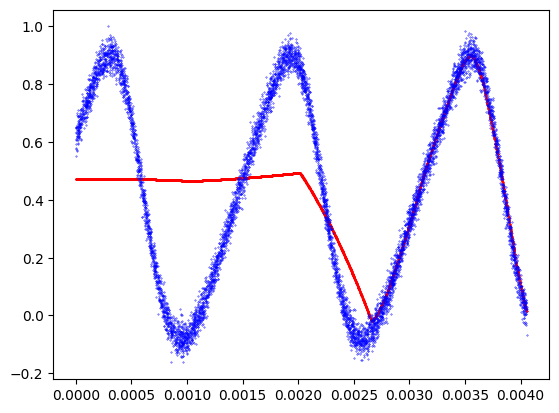

loss:  11.081399735691795 iteration:  10010
loss:  11.082153835127805 iteration:  10020
loss:  11.08266315237856 iteration:  10030
loss:  11.083436917328731 iteration:  10040
loss:  11.08388286925419 iteration:  10050
loss:  11.084607331249982 iteration:  10060
loss:  11.085236238103871 iteration:  10070
loss:  11.085831302904683 iteration:  10080
loss:  11.08659896272869 iteration:  10090
loss:  11.087125109151668 iteration:  10100
loss:  11.08788788814539 iteration:  10110
loss:  11.088414956257395 iteration:  10120
loss:  11.089166234531792 iteration:  10130
loss:  11.089501890566808 iteration:  10140
loss:  11.090052696834755 iteration:  10150
loss:  11.090927485130935 iteration:  10160
loss:  11.09134993851326 iteration:  10170
loss:  11.092077481176377 iteration:  10180
loss:  11.092724691360857 iteration:  10190
loss:  11.093470958417482 iteration:  10200
loss:  11.093978873124886 iteration:  10210
loss:  11.09459717347353 iteration:  10220
loss:  11.095280313343668 iteration:  

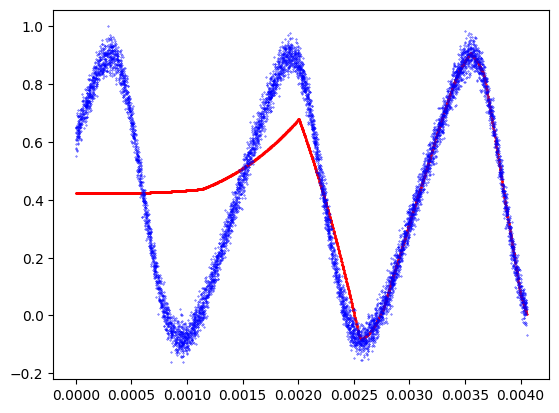

loss:  11.53712569828554 iteration:  15010
loss:  11.537645333559906 iteration:  15020
loss:  11.537880125853452 iteration:  15030
loss:  11.538265136704595 iteration:  15040
loss:  11.538465265189231 iteration:  15050
loss:  11.538978807214272 iteration:  15060
loss:  11.539434514551173 iteration:  15070
loss:  11.539500810106821 iteration:  15080
loss:  11.539786927418561 iteration:  15090
loss:  11.540139489135193 iteration:  15100
loss:  11.540222652584609 iteration:  15110
loss:  11.54058726268478 iteration:  15120
loss:  11.5409240326893 iteration:  15130
loss:  11.54102859235192 iteration:  15140
loss:  11.541340157076872 iteration:  15150
loss:  11.541561232535257 iteration:  15160
loss:  11.541792819339674 iteration:  15170
loss:  11.541814299302937 iteration:  15180
loss:  11.542287603816456 iteration:  15190
loss:  11.542250063203353 iteration:  15200
loss:  11.542428965622092 iteration:  15210
loss:  11.54247380870485 iteration:  15220
loss:  11.542568716612516 iteration:  

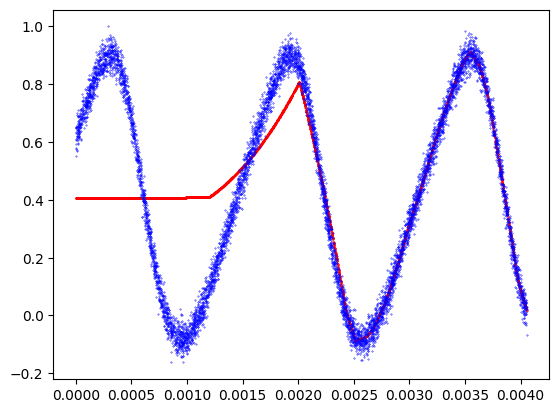

loss:  11.898856777419963 iteration:  20010
loss:  11.89987221818536 iteration:  20020
loss:  11.900971274552777 iteration:  20030
loss:  11.90183244915758 iteration:  20040
loss:  11.901930193678815 iteration:  20050
loss:  11.903236112070848 iteration:  20060
loss:  11.904275379784078 iteration:  20070
loss:  11.905110057755534 iteration:  20080
loss:  11.906104219741856 iteration:  20090
loss:  11.907130151800882 iteration:  20100
loss:  11.908110814132666 iteration:  20110
loss:  11.908885637964934 iteration:  20120
loss:  11.909869935810892 iteration:  20130
loss:  11.910889449766296 iteration:  20140
loss:  11.911872279530767 iteration:  20150
loss:  11.912260604368807 iteration:  20160
loss:  11.913206283278335 iteration:  20170
loss:  11.914020855538269 iteration:  20180
loss:  11.915057336058286 iteration:  20190
loss:  11.915883979772632 iteration:  20200
loss:  11.91703489510614 iteration:  20210
loss:  11.917846876057725 iteration:  20220
loss:  11.918967086985315 iteration

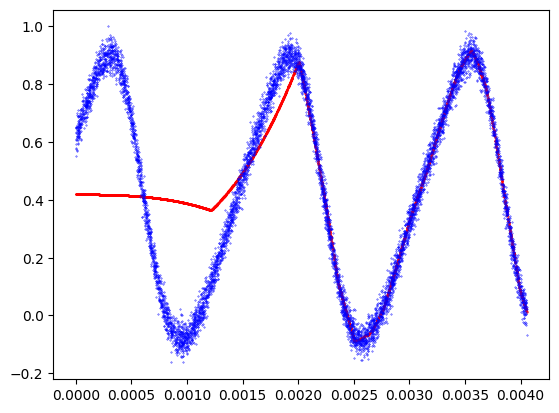

loss:  12.488952732951256 iteration:  25010
loss:  12.49031862559501 iteration:  25020
loss:  12.491759345899572 iteration:  25030
loss:  12.492903538885768 iteration:  25040
loss:  12.494163995613503 iteration:  25050
loss:  12.495116919041894 iteration:  25060
loss:  12.496550611492523 iteration:  25070
loss:  12.497696821860831 iteration:  25080
loss:  12.498745795644872 iteration:  25090
loss:  12.500136684920273 iteration:  25100
loss:  12.501325571961367 iteration:  25110
loss:  12.502514145716134 iteration:  25120
loss:  12.503894184603867 iteration:  25130
loss:  12.50496039116698 iteration:  25140
loss:  12.506004775979145 iteration:  25150
loss:  12.507193016674673 iteration:  25160
loss:  12.508198088148143 iteration:  25170
loss:  12.509694903895884 iteration:  25180
loss:  12.5111435914103 iteration:  25190
loss:  12.5125748010052 iteration:  25200
loss:  12.513947137465411 iteration:  25210
loss:  12.515326751435035 iteration:  25220
loss:  12.516853851815766 iteration:  

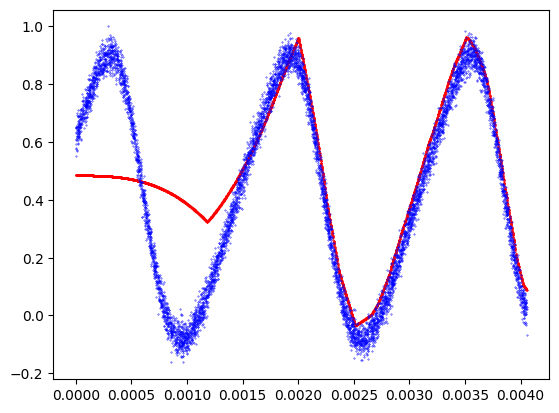

loss:  12.622483248051157 iteration:  30010
loss:  12.622785460771293 iteration:  30020
loss:  12.62304549137121 iteration:  30030
loss:  12.623438840279757 iteration:  30040
loss:  12.62364130077596 iteration:  30050
loss:  12.624031417105229 iteration:  30060
loss:  12.624395026710177 iteration:  30070
loss:  12.624605282319017 iteration:  30080
loss:  12.624902130329218 iteration:  30090
loss:  12.625058762370587 iteration:  30100
loss:  12.625266209350372 iteration:  30110
loss:  12.625393595541158 iteration:  30120
loss:  12.625563576324888 iteration:  30130
loss:  12.62577130074499 iteration:  30140
loss:  12.626029707917287 iteration:  30150
loss:  12.626030339950773 iteration:  30160
loss:  12.626244182451346 iteration:  30170
loss:  12.626424615272565 iteration:  30180
loss:  12.626681789714725 iteration:  30190
loss:  12.626758059806267 iteration:  30200
loss:  12.627049774860602 iteration:  30210
loss:  12.627353625691022 iteration:  30220
loss:  12.627607597103156 iteration

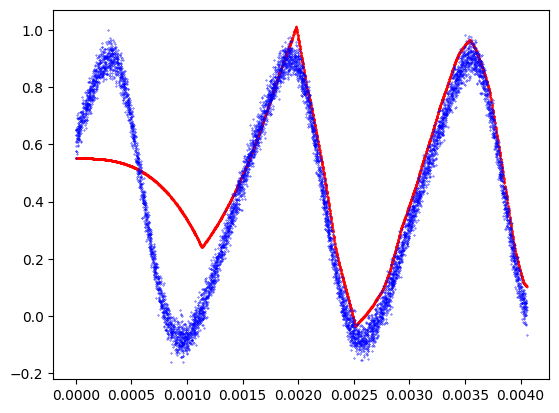

loss:  12.604842452411097 iteration:  35010
loss:  12.604566519056855 iteration:  35020
loss:  12.60395613836573 iteration:  35030
loss:  12.603536413697272 iteration:  35040
loss:  12.603201628089426 iteration:  35050
loss:  12.602874535136998 iteration:  35060
loss:  12.60254378286819 iteration:  35070
loss:  12.602093165310965 iteration:  35080
loss:  12.601844410214092 iteration:  35090
loss:  12.601699745806584 iteration:  35100
loss:  12.601540297643158 iteration:  35110
loss:  12.601421146556037 iteration:  35120
loss:  12.601167845181031 iteration:  35130
loss:  12.601195629031432 iteration:  35140
loss:  12.600916825754997 iteration:  35150
loss:  12.60099597705794 iteration:  35160
loss:  12.600791516034068 iteration:  35170
loss:  12.600775070779871 iteration:  35180
loss:  12.600558361409847 iteration:  35190
loss:  12.60053331123755 iteration:  35200
loss:  12.600470472251756 iteration:  35210
loss:  12.600147504417963 iteration:  35220
loss:  12.60007249680892 iteration: 

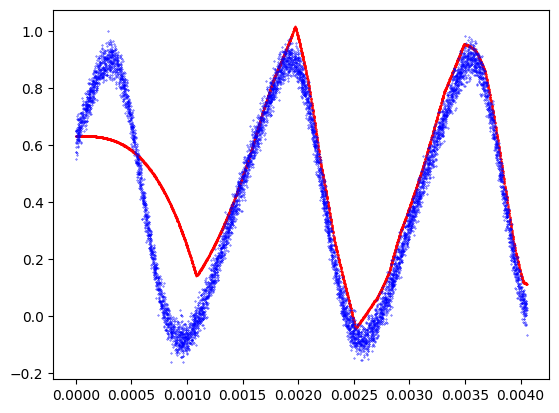

loss:  12.591835407361925 iteration:  40010
loss:  12.591339899496521 iteration:  40020
loss:  12.590788470625299 iteration:  40030
loss:  12.59028885719356 iteration:  40040
loss:  12.589681101177938 iteration:  40050
loss:  12.589124721646597 iteration:  40060
loss:  12.588522306794983 iteration:  40070
loss:  12.587911946074836 iteration:  40080
loss:  12.587206442470613 iteration:  40090
loss:  12.586567221934441 iteration:  40100
loss:  12.585871255946577 iteration:  40110
loss:  12.585177875093827 iteration:  40120
loss:  12.58449068854908 iteration:  40130
loss:  12.583758047330214 iteration:  40140
loss:  12.582991225799676 iteration:  40150
loss:  12.582420502988851 iteration:  40160
loss:  12.582179904442535 iteration:  40170
loss:  12.581585989066538 iteration:  40180
loss:  12.580888913373615 iteration:  40190
loss:  12.580273283023349 iteration:  40200
loss:  12.579828260635802 iteration:  40210
loss:  12.579504357649443 iteration:  40220
loss:  12.579287938017318 iteratio

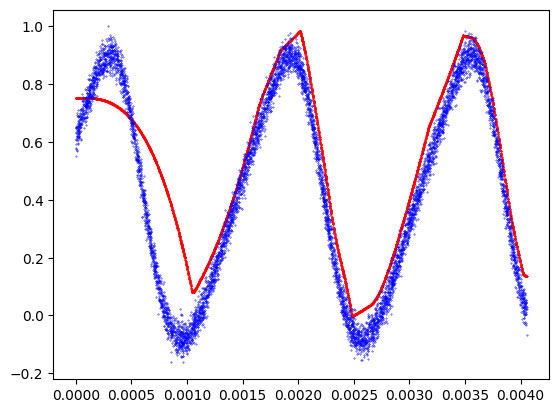

loss:  12.180604575200142 iteration:  45010
loss:  12.177735787643345 iteration:  45020
loss:  12.176333097178643 iteration:  45030
loss:  12.17542734612442 iteration:  45040
loss:  12.17501686969583 iteration:  45050
loss:  12.174979130513046 iteration:  45060
loss:  12.17526688723003 iteration:  45070
loss:  12.175795365848996 iteration:  45080
loss:  12.17651321279779 iteration:  45090
loss:  12.177359847037847 iteration:  45100
loss:  12.178309039536414 iteration:  45110
loss:  12.179306640396636 iteration:  45120
loss:  12.180230057138873 iteration:  45130
loss:  12.181087472318028 iteration:  45140
loss:  12.181805887984433 iteration:  45150
loss:  12.182320325807625 iteration:  45160
loss:  12.182570526938441 iteration:  45170
loss:  12.18244615883156 iteration:  45180
loss:  12.182217315656759 iteration:  45190
loss:  12.181371971496775 iteration:  45200
loss:  12.179639629810419 iteration:  45210
loss:  12.176857810689826 iteration:  45220
loss:  12.173120344906252 iteration: 

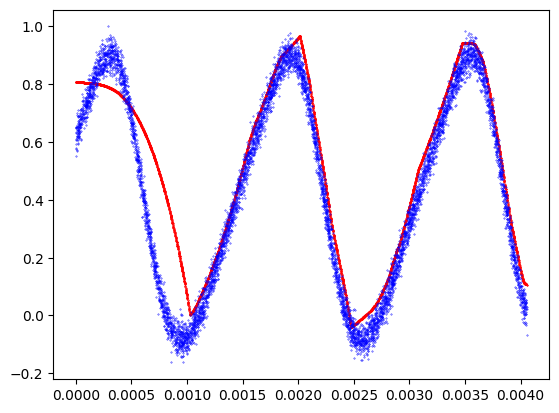

loss:  11.686086988778719 iteration:  50010
loss:  11.685455483118531 iteration:  50020
loss:  11.684819180673673 iteration:  50030
loss:  11.684169841457292 iteration:  50040
loss:  11.6835084211153 iteration:  50050
loss:  11.682839894922324 iteration:  50060
loss:  11.68216779365703 iteration:  50070
loss:  11.681496908625801 iteration:  50080
loss:  11.680825758265833 iteration:  50090
loss:  11.68015335957546 iteration:  50100
loss:  11.679470902642992 iteration:  50110
loss:  11.678781895844764 iteration:  50120
loss:  11.678093808796577 iteration:  50130
loss:  11.677411470356885 iteration:  50140
loss:  11.676745305109202 iteration:  50150
loss:  11.676094993976823 iteration:  50160
loss:  11.675447058593212 iteration:  50170
loss:  11.67479932025687 iteration:  50180
loss:  11.674154516750104 iteration:  50190
loss:  11.673511796618612 iteration:  50200
loss:  11.672881260276014 iteration:  50210
loss:  11.672249540240616 iteration:  50220
loss:  11.671631432917131 iteration: 

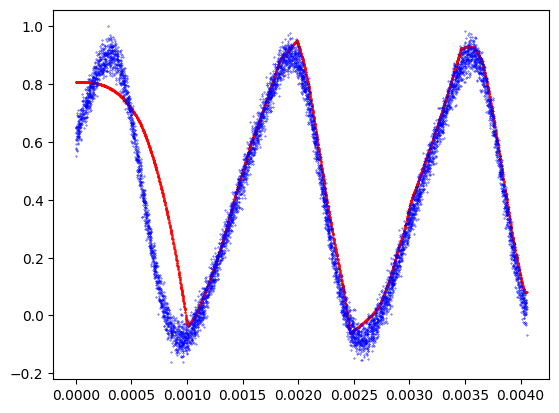

loss:  11.586528616003717 iteration:  55010
loss:  11.587067179579488 iteration:  55020
loss:  11.58758509733108 iteration:  55030
loss:  11.588123335084783 iteration:  55040
loss:  11.588678426360323 iteration:  55050
loss:  11.58923249456388 iteration:  55060
loss:  11.589803494379414 iteration:  55070
loss:  11.590375587920073 iteration:  55080
loss:  11.590936400729952 iteration:  55090
loss:  11.591511898908205 iteration:  55100
loss:  11.592115392219254 iteration:  55110
loss:  11.59272433093722 iteration:  55120
loss:  11.593348054676055 iteration:  55130
loss:  11.593967971589592 iteration:  55140
loss:  11.59458990977655 iteration:  55150
loss:  11.595208200448335 iteration:  55160
loss:  11.595824521633045 iteration:  55170
loss:  11.59644510602526 iteration:  55180
loss:  11.59707615832586 iteration:  55190
loss:  11.597725097042517 iteration:  55200
loss:  11.598386557179193 iteration:  55210
loss:  11.599045082940153 iteration:  55220
loss:  11.599727364224377 iteration:  

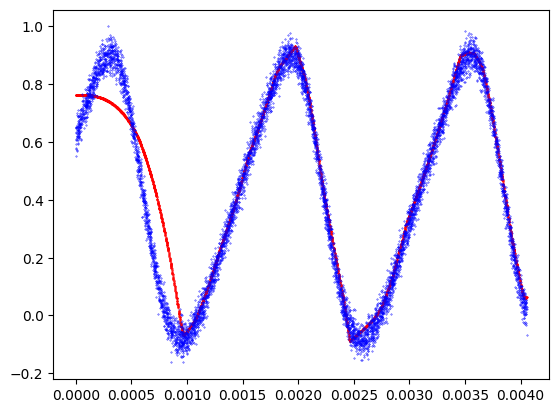

loss:  11.63874616412085 iteration:  60010
loss:  11.623638317464131 iteration:  60020
loss:  11.613395236585067 iteration:  60030
loss:  11.63249795445647 iteration:  60040
loss:  11.64066044284143 iteration:  60050
loss:  11.630004706876406 iteration:  60060
loss:  11.612220354990855 iteration:  60070
loss:  11.624674202725744 iteration:  60080
loss:  11.63837473288861 iteration:  60090
loss:  11.63509917766227 iteration:  60100
loss:  11.618706968654745 iteration:  60110
loss:  11.616027085168593 iteration:  60120
loss:  11.633763143903119 iteration:  60130
loss:  11.63873639534552 iteration:  60140
loss:  11.62524127101226 iteration:  60150
loss:  11.609063448465298 iteration:  60160
loss:  11.626935789357876 iteration:  60170
loss:  11.638089088859417 iteration:  60180
loss:  11.631121894263734 iteration:  60190
loss:  11.613690241695588 iteration:  60200
loss:  11.618426289855792 iteration:  60210
loss:  11.634666860174715 iteration:  60220
loss:  11.635500882920821 iteration:  6

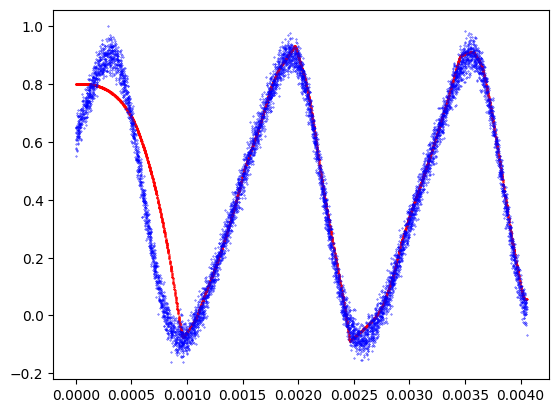

loss:  11.556206713950267 iteration:  65010
loss:  11.538204106793415 iteration:  65020
loss:  11.556137800250806 iteration:  65030
loss:  11.570114156126365 iteration:  65040
loss:  11.571418574729142 iteration:  65050
loss:  11.55482594988666 iteration:  65060
loss:  11.536804494520565 iteration:  65070
loss:  11.555732644231368 iteration:  65080
loss:  11.569375464268294 iteration:  65090
loss:  11.570136649053536 iteration:  65100
loss:  11.553264583054865 iteration:  65110
loss:  11.535765072168948 iteration:  65120
loss:  11.555701820817097 iteration:  65130
loss:  11.568679563122252 iteration:  65140
loss:  11.567977391322088 iteration:  65150
loss:  11.550604223416407 iteration:  65160
loss:  11.534873603986206 iteration:  65170
loss:  11.556368725432419 iteration:  65180
loss:  11.568527380158296 iteration:  65190
loss:  11.566671114746166 iteration:  65200
loss:  11.548600545511396 iteration:  65210
loss:  11.53404344287902 iteration:  65220
loss:  11.556299585352322 iteratio

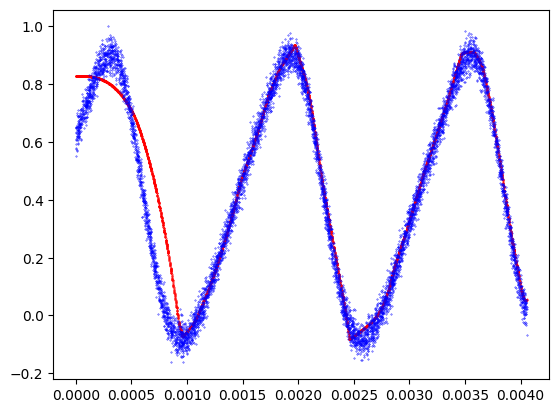

loss:  11.497227049523717 iteration:  70010
loss:  11.482576039650509 iteration:  70020
loss:  11.505951488823651 iteration:  70030
loss:  11.518497474219501 iteration:  70040
loss:  11.520753611418293 iteration:  70050
loss:  11.505094152860732 iteration:  70060
loss:  11.484358872879907 iteration:  70070
loss:  11.500222575406134 iteration:  70080
loss:  11.51597234561415 iteration:  70090
loss:  11.52161197065599 iteration:  70100
loss:  11.511304556410218 iteration:  70110
loss:  11.489935041619237 iteration:  70120
loss:  11.493676605787767 iteration:  70130
loss:  11.51317690279407 iteration:  70140
loss:  11.521747648019188 iteration:  70150
loss:  11.51753063238709 iteration:  70160
loss:  11.497211039799852 iteration:  70170
loss:  11.486204625220173 iteration:  70180
loss:  11.50912908875162 iteration:  70190
loss:  11.520723911759694 iteration:  70200
loss:  11.521369816233237 iteration:  70210
loss:  11.503748118960692 iteration:  70220
loss:  11.48534911756567 iteration:  

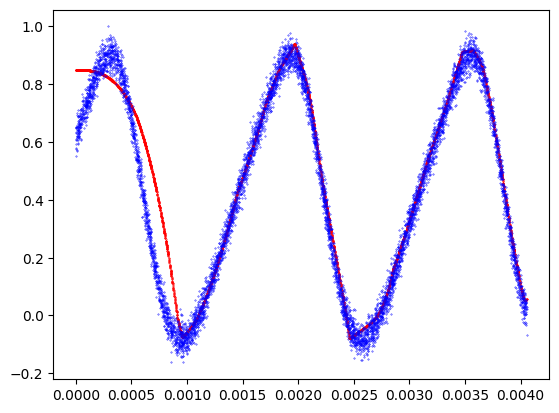

loss:  11.56723783780276 iteration:  75010
loss:  11.559522321774146 iteration:  75020
loss:  11.582120506680093 iteration:  75030
loss:  11.593120709488478 iteration:  75040
loss:  11.594495341563793 iteration:  75050
loss:  11.577529560726948 iteration:  75060
loss:  11.557255731484986 iteration:  75070
loss:  11.575835491375644 iteration:  75080
loss:  11.590654815214217 iteration:  75090
loss:  11.59628598464548 iteration:  75100
loss:  11.587231677638389 iteration:  75110
loss:  11.56480792106086 iteration:  75120
loss:  11.566938528943242 iteration:  75130
loss:  11.586919667099753 iteration:  75140
loss:  11.596162065735 iteration:  75150
loss:  11.594814483797288 iteration:  75160
loss:  11.574799091330803 iteration:  75170
loss:  11.558379505414901 iteration:  75180
loss:  11.581691057728731 iteration:  75190
loss:  11.594517299576745 iteration:  75200
loss:  11.598183160546967 iteration:  75210
loss:  11.585066097922686 iteration:  75220
loss:  11.562743740110687 iteration:  

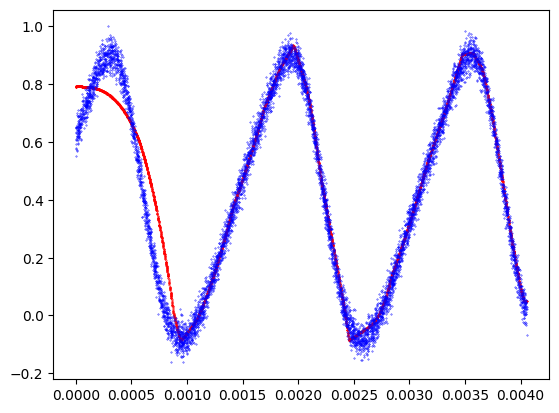

loss:  11.687419211817634 iteration:  80010
loss:  11.68695766102181 iteration:  80020
loss:  11.667708327428898 iteration:  80030
loss:  11.650229085763856 iteration:  80040
loss:  11.67300903242073 iteration:  80050
loss:  11.68571052536788 iteration:  80060
loss:  11.689626046408712 iteration:  80070
loss:  11.678163442623093 iteration:  80080
loss:  11.655203551213608 iteration:  80090
loss:  11.66555378549938 iteration:  80100
loss:  11.682773143659391 iteration:  80110
loss:  11.690299353823697 iteration:  80120
loss:  11.686832937020043 iteration:  80130
loss:  11.66472215175108 iteration:  80140
loss:  11.656178990658834 iteration:  80150
loss:  11.678468285454452 iteration:  80160
loss:  11.689366092559883 iteration:  80170
loss:  11.691229910562688 iteration:  80180
loss:  11.675682499643848 iteration:  80190
loss:  11.654367331267805 iteration:  80200
loss:  11.672251106521314 iteration:  80210
loss:  11.686984849536453 iteration:  80220
loss:  11.692783302631362 iteration: 

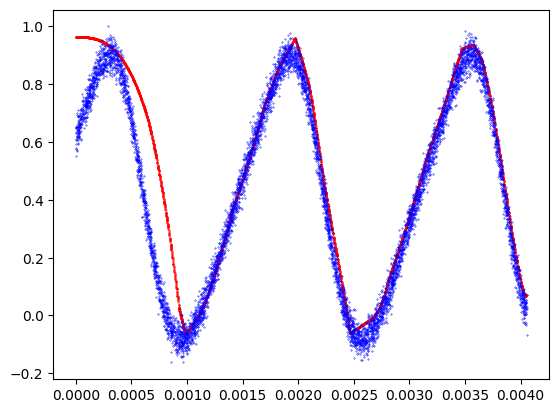

loss:  11.747952488732151 iteration:  85010
loss:  11.769898806502445 iteration:  85020
loss:  11.781127240154524 iteration:  85030
loss:  11.78385360309669 iteration:  85040
loss:  11.771118161714796 iteration:  85050
loss:  11.748969540665996 iteration:  85060
loss:  11.763287871007398 iteration:  85070
loss:  11.778607054732987 iteration:  85080
loss:  11.784926222899898 iteration:  85090
loss:  11.780262961848484 iteration:  85100
loss:  11.757439449713265 iteration:  85110
loss:  11.754634778901524 iteration:  85120
loss:  11.77488393050842 iteration:  85130
loss:  11.784433680394471 iteration:  85140
loss:  11.785183501878905 iteration:  85150
loss:  11.768436925140039 iteration:  85160
loss:  11.749369862918325 iteration:  85170
loss:  11.769514166787967 iteration:  85180
loss:  11.782555545538068 iteration:  85190
loss:  11.787174074655292 iteration:  85200
loss:  11.778552066521806 iteration:  85210
loss:  11.755339641608964 iteration:  85220
loss:  11.761664779930864 iteratio

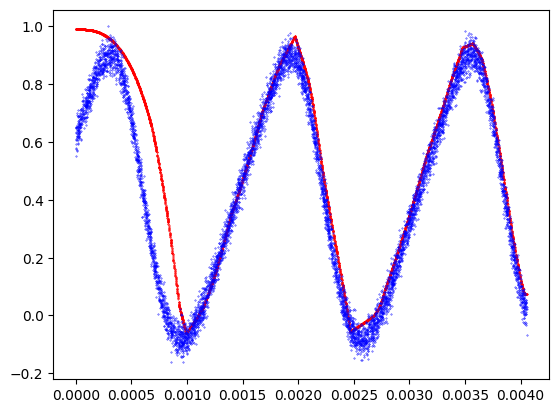

loss:  11.851395519940858 iteration:  90010
loss:  11.8711140523808 iteration:  90020
loss:  11.880174767673381 iteration:  90030
loss:  11.881372790857041 iteration:  90040
loss:  11.866344204337048 iteration:  90050
loss:  11.844847747461438 iteration:  90060
loss:  11.862125106495926 iteration:  90070
loss:  11.876611689522997 iteration:  90080
loss:  11.882777641105765 iteration:  90090
loss:  11.87915174491306 iteration:  90100
loss:  11.856792120624668 iteration:  90110
loss:  11.848773906318772 iteration:  90120
loss:  11.870683242428766 iteration:  90130
loss:  11.88116703929176 iteration:  90140
loss:  11.88403561468952 iteration:  90150
loss:  11.87296569692254 iteration:  90160
loss:  11.849617715319592 iteration:  90170
loss:  11.860033478281633 iteration:  90180
loss:  11.876861782751424 iteration:  90190
loss:  11.884430545047902 iteration:  90200
loss:  11.883393753777476 iteration:  90210
loss:  11.864306834293963 iteration:  90220
loss:  11.846974693284762 iteration:  

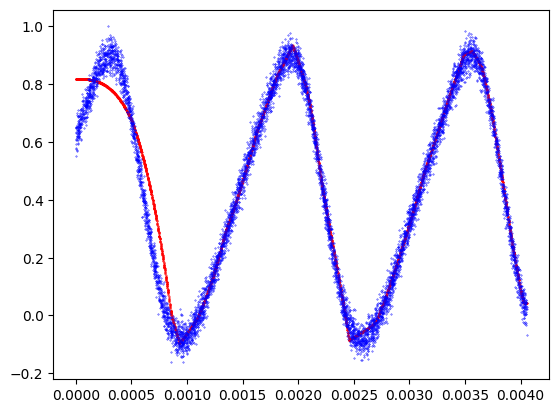

loss:  11.97225092769099 iteration:  95010
loss:  11.948630708615163 iteration:  95020
loss:  11.950283190823297 iteration:  95030
loss:  11.969922988047236 iteration:  95040
loss:  11.978995843981682 iteration:  95050
loss:  11.981281628828338 iteration:  95060
loss:  11.97020903933852 iteration:  95070
loss:  11.946768215076517 iteration:  95080
loss:  11.95510832903359 iteration:  95090
loss:  11.97273096131592 iteration:  95100
loss:  11.980766766147633 iteration:  95110
loss:  11.981727226699734 iteration:  95120
loss:  11.967196431982806 iteration:  95130
loss:  11.945267827823715 iteration:  95140
loss:  11.960373446976577 iteration:  95150
loss:  11.975611241410236 iteration:  95160
loss:  11.982422634384962 iteration:  95170
loss:  11.98137553060465 iteration:  95180
loss:  11.962778503455647 iteration:  95190
loss:  11.944878674184968 iteration:  95200
loss:  11.965903970534388 iteration:  95210
loss:  11.97875736406015 iteration:  95220
loss:  11.98405386249705 iteration:  9

In [57]:
W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, A5 = gradient_descent(X_train, Y_train, 0.01, 100000)

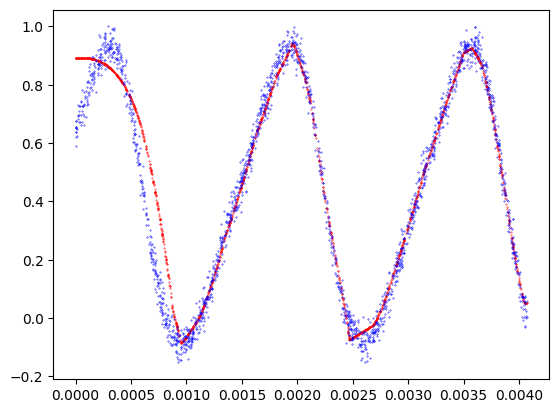

In [58]:
Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, y_pred = forward_prop(X_test, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5)

plt.scatter(X_test[0], y_pred, s=0.1, label='prediction', c='r')
plt.scatter(X_test[0], Y_test, s=0.1, label='actual', c='b')
